# Data Analysis
​
Before jumping into the task of classifying documents into classes, we should always look at the underlying data. 
​
## Basic Dataset Stats
doc.startswith("train")
from nltk.corpus import reuters

In [1]:
from nltk.corpus import reuters

# List of document ids
documents = reuters.fileids()
print("Documents: {}".format(len(documents)))

# Train documents
train_docs_id = list(filter(lambda doc: doc.startswith("train"), documents))
print("Total train documents: {}".format(len(train_docs_id)))

# Test documents
test_docs_id = list(filter(lambda doc: doc.startswith("test"), documents))
print("Total test documents: {}".format(len(test_docs_id)))

Documents: 10788
Total train documents: 7769
Total test documents: 3019


## How does the data look like?


In [2]:
# Example of a document (with multiple labels)
doc = 'training/9865'
print('CONTENT')
print(reuters.raw(doc))

print('LABELS')
print(reuters.categories(doc))

CONTENT
FRENCH FREE MARKET CEREAL EXPORT BIDS DETAILED
  French operators have requested licences
  to export 675,500 tonnes of maize, 245,000 tonnes of barley,
  22,000 tonnes of soft bread wheat and 20,000 tonnes of feed
  wheat at today's European Community tender, traders said.
      Rebates requested ranged from 127.75 to 132.50 European
  Currency Units a tonne for maize, 136.00 to 141.00 Ecus a tonne
  for barley and 134.25 to 141.81 Ecus for bread wheat, while
  rebates requested for feed wheat were 137.65 Ecus, they said.
  


LABELS
['barley', 'corn', 'grain', 'wheat']


## Categories information

In [3]:
from operator import itemgetter
import pandas as pd

# List of categories 
categories = reuters.categories();

# Documents per category
category_distribution = pd.DataFrame([(category, len(reuters.fileids(category))) 
                                      for category in categories], columns=['class','documents'])
category_distribution = category_distribution.set_index(['class'])

,documents
class,
earn,3964
acq,2369
money-fx,717
grain,582
crude,578
...,...
sun-meal,2
groundnut-oil,2
rye,2


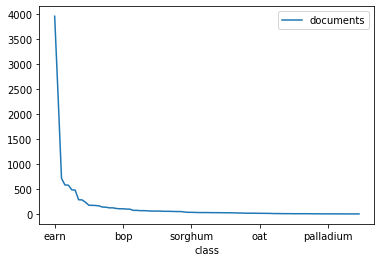

In [5]:
sorted_data = category_distribution.sort_values(by='documents', 
                                                ascending=False)
sorted_data.plot()
sorted_data